## Case_Study #05 , ANOVA
### Sreelekshmy S L
### NDSA_B4

#### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Load the dataset into python environment


In [2]:
titanic_data = pd.read_csv('titanic_dataset.csv')

In [3]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 2. Make ‘PassengerId’ as the index column


#### Use .set_index to set an existing column as the index

In [4]:
titanic_data.set_index('PassengerId',inplace=True)
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. Check the basic details of the dataset


In [5]:
titanic_data.shape

(891, 11)

#### There are 891 rows and 11 columns in the data.

In [6]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


#### The data types are assigned correctly.

In [7]:
titanic_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#### There are three columns with null values: Age,Cabin and Embarked. 

#### Now we find the summary of all numerical columns

In [8]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


###  4. Fill in all the missing values present in all the columns in the dataset

#### Check for null values.

In [9]:
titanic_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#### The columns Age, Cabin and Embarked have null values in them, the largest number is 687 for Cabin and the smallest number is 2 for Embarked

#### Now let's check each column seperately and decide whether to drop or impute them.

### a) Age

In [10]:
titanic_data['Age'].isnull().sum()

177

#### Since there are 177 null values, we are not going to drop them instead we fill them with the median value of age.

In [11]:
titanic_data['Age'].fillna(titanic_data['Age'].median(),inplace=True)

In [12]:
titanic_data['Age'].isnull().sum()

0

### b) Embarked

In [13]:
titanic_data['Embarked'].isnull().sum()

2

#### Here ther are only 2 values missing, since it is a categorical variable we will fill it with the mode of the variable.

In [14]:
titanic_data['Embarked'].mode()

0    S
dtype: object

In [15]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)

In [16]:
titanic_data['Embarked'].isnull().sum()

0

### c) Cabin

In [17]:
titanic_data['Cabin'].isnull().sum()

687

#### Since there are 891 rows and out of which 687 are missing cabin data it is better to drop the column.
#### But here it is asked to fill all null values, since it is not reasonable to fill the cabin with mode as cabin value can't be same for a lot of passengers. <br>So we will first seperate out the cabin column and select the First letter only.

In [18]:
import warnings
warnings.filterwarnings('ignore')
titanic_data['Cabin_Letter'] = titanic_data['Cabin'].str.extract('([A-Z]+)')
titanic_data['Cabin_Number'] = titanic_data['Cabin'].str.replace('([A-Z]+)', '')

In [19]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Letter,Cabin_Number
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,85
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,123
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN


#### So we have two additional columns with cabin's first letter and its number.

#### Now  we will group the data by Pclass and fill the Cabin_Letter column with  corresponding mode on each Pclass

In [20]:
titanic_data['Cabin_Letter']=titanic_data.groupby('Pclass').transform(lambda x: x.fillna(x.mode()[0]))['Cabin_Letter']

In [21]:
titanic_data['Cabin_Letter'].isnull().sum()

0

#### The null values are completely filled

#### We could even remove the cabin and cabin_number column to make the data more useful as below and store it under a new name

In [22]:
titanic_data_1=titanic_data.drop(['Cabin','Cabin_Number'],axis=1)
titanic_data_1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Letter
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,F
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,F
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,F
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,F
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,B
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,F


In [23]:
titanic_data_1.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Cabin_Letter    0
dtype: int64

#### So we basically removed all the null values (exception is in Cabin which we now converted to Cabin_Letter for ease of usage)

### 5. Check and handle outliers in at least 3 columns in the dataset

### A) Fare

#### Check the outliers using boxplot

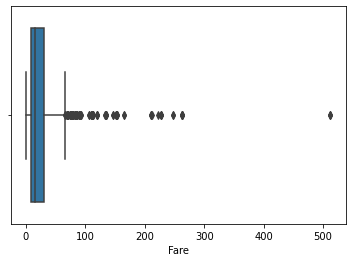

In [24]:
sns.boxplot(x=titanic_data_1['Fare']);

#### Many outliers found in Fare column.<br> Now use interquartile range method to find values above and below a certain limit.

In [25]:
Q1 = np.percentile(titanic_data_1['Fare'],25,interpolation='midpoint')
Q2 = np.percentile(titanic_data_1['Fare'],50,interpolation='midpoint')
Q3 = np.percentile(titanic_data_1['Fare'],75,interpolation='midpoint')
IQR = Q3-Q1
low_limit = Q1-1.5*IQR     
up_limit = Q3 + 1.5*IQR
outlier = []
for x in titanic_data_1['Fare']:
    if (x > up_limit) or (x < low_limit):
        outlier.append(x)
print('Total number of outliers in column Fare = ',len(outlier)  )

Total number of outliers in column Fare =  116


#### There are 116 outliers in the data. Now let's grab these specific data index and store it in a variable named 'ind'.

In [26]:
out_data = titanic_data_1['Fare'] > up_limit
ind=titanic_data_1.loc[out_data].index

#### Now plot the histogram of Fare column to understand the skewness and to decide how to replace the values.

<AxesSubplot:ylabel='Density'>

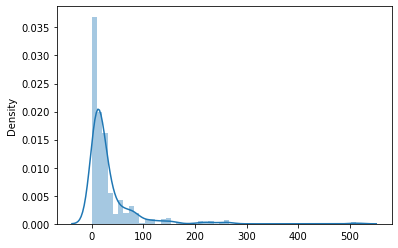

In [27]:
sns.distplot(x=titanic_data_1['Fare'])

#### Check the Pclass for the outliers

In [28]:
titanic_data_1.loc[out_data]['Pclass'].value_counts()

1    104
3      7
2      5
Name: Pclass, dtype: int64

#### Since 104 are in Pclass 1. I decide to replace the outlier Fare value with the median Fare for Pclass 1.

In [29]:
df=titanic_data_1.groupby('Pclass')
m=df.get_group(1)['Fare'].median()
m

60.287499999999994

In [30]:
titanic_data_1.loc[list(ind),'Fare']=m

#### Now again plot the boxplot

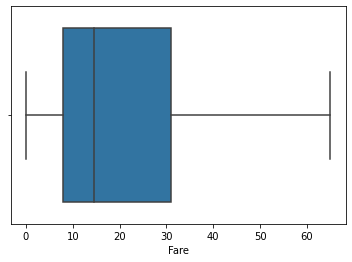

In [31]:
sns.boxplot(x=titanic_data_1['Fare']);

#### All the outliers are thus gone.
### b) Age

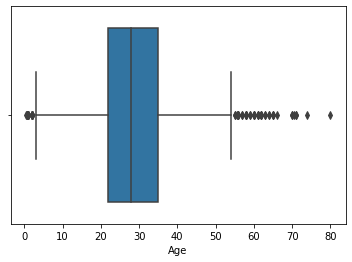

In [32]:
sns.boxplot(x=titanic_data_1['Age']);

In [33]:
Q1 = np.percentile(titanic_data_1['Age'],25,interpolation='midpoint')
Q2 = np.percentile(titanic_data_1['Age'],50,interpolation='midpoint')
Q3 = np.percentile(titanic_data_1['Age'],75,interpolation='midpoint')
IQR = Q3-Q1
low_limit = Q1-1.5*IQR     
up_limit = Q3 + 1.5*IQR
outlier = []
for x in titanic_data_1['Age']:
    if (x > up_limit) or (x < low_limit):
        outlier.append(x)
print('Total number of outliers in column Fare = ',len(outlier)  )

Total number of outliers in column Fare =  66


In [34]:
up_data = titanic_data_1['Age'] > up_limit
low_data =titanic_data_1['Age'] < low_limit
ind_1=titanic_data_1.loc[up_data].index
ind_2=titanic_data_1.loc[low_data].index

In [35]:
print('No of data above threshold:',len(ind_1) ,' and no of data below threshold :',len(ind_2)) 

No of data above threshold: 42  and no of data below threshold : 24


In [36]:
#median_age = titanic_data_1['Age'].median()
#titanic_data_1.loc[list(ind_1),'Age']=median_age
#titanic_data_1.loc[list(ind_2),'Age']=median_age
titanic_data_1.drop(ind_1,inplace=True)
titanic_data_1.drop(ind_2,inplace=True)

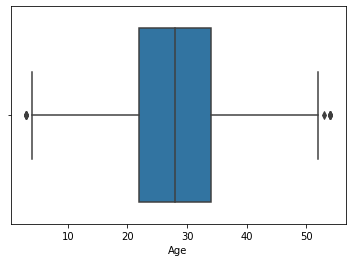

In [37]:
sns.boxplot(x=titanic_data_1['Age']);

### 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

#### First let us seperate out X and y from the data set. <br>For X I am going to drop all the unnecessary columns such as Ticket,Name,Cabin_Letter and the target variable Survived. And also let us one-hot encode the remaining categorical columns using pd.get_dummies<br>And set the target variable y as Survived alone

In [38]:
X = pd.get_dummies(titanic_data_1.drop(['Survived','Ticket','Name','Cabin_Letter'],axis=1),drop_first=True)
y = titanic_data_1['Survived']


#### Now let us apply the min-max scaling to X and view the data

In [39]:
from sklearn import preprocessing 

In [40]:
# create instance of min-max from preprocesing anf feature range  to which the data should assign to
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
#fit transform
X = min_max.fit_transform(X)
X=pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7
0,1.0,0.372549,0.125,0.000000,0.111538,1.0,0.0,1.0
1,0.0,0.686275,0.125,0.000000,0.927500,0.0,0.0,0.0
2,1.0,0.450980,0.000,0.000000,0.121923,0.0,0.0,1.0
3,0.0,0.627451,0.125,0.000000,0.816923,0.0,0.0,1.0
4,1.0,0.627451,0.000,0.000000,0.123846,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
820,0.5,0.470588,0.000,0.000000,0.200000,1.0,0.0,1.0
821,0.0,0.313725,0.000,0.000000,0.461538,0.0,0.0,1.0
822,1.0,0.490196,0.125,0.333333,0.360769,0.0,0.0,1.0
823,0.0,0.450980,0.000,0.000000,0.461538,1.0,0.0,0.0


#### Now let's split the data into train and test data and fit a linear regression model.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model=lr.fit(X_train,y_train)
predictions = model.predict(X_test)


#### And let us evaluate the model and the min-max scale using mean_squared_error and R^2 values.

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('MSE = ', mean_squared_error(y_test,predictions))
print('R^2 value is = ',r2_score(y_test,predictions) )

MSE =  0.13220737134778338
R^2 value is =  0.44913595271756923


In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('MSE = ', mean_squared_error(y_test,predictions))
print('R^2 value is = ',r2_score(y_test,predictions) )

MSE =  0.13220737134778338
R^2 value is =  0.44913595271756923
